In [ ]:
#Dataset source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

import numpy as np
import pandas as pd

df=pd.read_csv("heart.csv")

In [ ]:
df #view data frame

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.columns #check columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
#dropping Oldpeak as I don't intend to use it
df.drop(['Oldpeak'],axis=1,inplace=True)

In [ ]:
df.dtypes #check data type of columns

Age                int64
Sex               object
ChestPainType     object
RestingBP          int64
Cholesterol        int64
FastingBS          int64
RestingECG        object
MaxHR              int64
ExerciseAngina    object
ST_Slope          object
HeartDisease       int64
dtype: object

In [ ]:
df.isnull().sum() #check for null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values we need to fill.

In [ ]:
df.describe() #check stats of numerical columns

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000


In [ ]:
df.corr() #check correlation between numerical columns

<ipython-input-8-1a1ab890145b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #check correlation between numerical columns


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.400421
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,1.000000


In [ ]:
print(df['Sex'].unique()) #view unique values of object type columns
print(df['ChestPainType'].unique())
print(df['RestingECG'].unique())
print(df['ExerciseAngina'].unique())
print(df['ST_Slope'].unique())

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


ChestPainType values are in ancronyms, which makes it hard to understand them. So now I'll replace these values with their full forms

In [ ]:
df['ChestPainType']=df['ChestPainType'].replace(['ATA','NAP','ASY','TA'],['Atypical Angina','Non-anginal Pain','Asymptomatic','Typical Angina'])

In [ ]:
#Checking updated dataframe
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,40,M,Atypical Angina,140,289,0,Normal,172,N,Up,0
1,49,F,Non-anginal Pain,160,180,0,Normal,156,N,Flat,1
2,37,M,Atypical Angina,130,283,0,ST,98,N,Up,0
3,48,F,Asymptomatic,138,214,0,Normal,108,Y,Flat,1
4,54,M,Non-anginal Pain,150,195,0,Normal,122,N,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,Typical Angina,110,264,0,Normal,132,N,Flat,1
914,68,M,Asymptomatic,144,193,1,Normal,141,N,Flat,1
915,57,M,Asymptomatic,130,131,0,Normal,115,Y,Flat,1
916,57,F,Atypical Angina,130,236,0,LVH,174,N,Flat,1


In [ ]:
df['ChestPainType'].unique()

array(['Atypical Angina', 'Non-anginal Pain', 'Asymptomatic',
       'Typical Angina'], dtype=object)

In [ ]:
#Checking total no. of people who have the heart disease, and the percentage
print(df['HeartDisease'].sum(),"out of",df.shape[0])
print(100*df['HeartDisease'].sum()/df.shape[0],"%")

508 out of 918
55.33769063180828 %


In [ ]:
#Checking percentage of people who have a heart disease grouped by whether or not they have exercise induced angina
df.groupby('ExerciseAngina')['HeartDisease'].mean()*100

ExerciseAngina
N    35.100548
Y    85.175202
Name: HeartDisease, dtype: float64

We can see that 85% of people who have exercise induced angina have a heart disease. 35% of people who do not have exercise angina have a heart disease.

In [ ]:
#Checking percentage of people who have a heart disease grouped by Resting ECG
df.groupby('RestingECG')['HeartDisease'].mean()*100

RestingECG
LVH       56.382979
Normal    51.630435
ST        65.730337
Name: HeartDisease, dtype: float64

In [ ]:
#Checking correlation of age and heart disease
df['Age'].corr(df['HeartDisease'])

0.2820385058189969

So age and heart disease have a weak correlation.

In [ ]:
#Checking mean cholesterol levels in patients and non patients
df.groupby('HeartDisease')['Cholesterol'].mean()

HeartDisease
0    227.121951
1    175.940945
Name: Cholesterol, dtype: float64

In [ ]:
#Checking percentage of people who have a heart disease grouped by sex
df.groupby('Sex')['HeartDisease'].mean()*100

Sex
F    25.906736
M    63.172414
Name: HeartDisease, dtype: float64

Here we see that 63% of men have a heart disease while the percentage is low in women at 25%.

In [ ]:
#Checking percentage of people who have a heart disease grouped by fasting blood sugar (1 for >120 mg/dl and 0 for <120mg/dl)
df.groupby('FastingBS')['HeartDisease'].mean()*100

FastingBS
0    48.011364
1    79.439252
Name: HeartDisease, dtype: float64

Therefore, 79% of people who have >120 mg/dl fasting blood sugar have a heart disease.

In [ ]:
#Checking the most common type of chest pain in heart patients
patients=df[df['HeartDisease']==1] #saving only patient data in new data frame
patients.groupby('ChestPainType')['HeartDisease'].count()

ChestPainType
Asymptomatic        392
Atypical Angina      24
Non-anginal Pain     72
Typical Angina       20
Name: HeartDisease, dtype: int64

Thus, most patients are asymoptomatic. The most common type of pain is non-anginal pain

In [ ]:
#Checking the most common type of resting ECG in heart patients
patients.groupby('RestingECG')['HeartDisease'].count()

RestingECG
LVH       106
Normal    285
ST        117
Name: HeartDisease, dtype: int64

In [ ]:
#Checking the most common type of resting ECG in non heart patients
nonpatients=df[df['HeartDisease']==0]
nonpatients.groupby('RestingECG')['HeartDisease'].count()

RestingECG
LVH        82
Normal    267
ST         61
Name: HeartDisease, dtype: int64

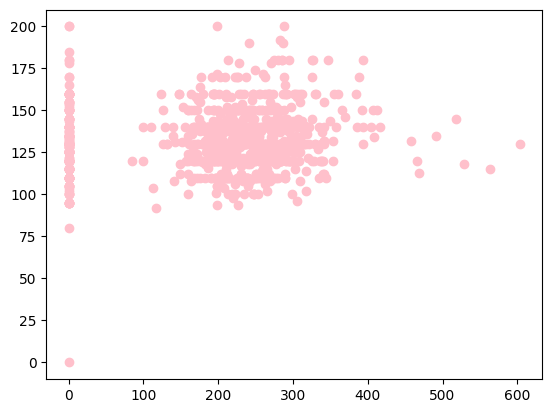

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['Cholesterol'],df['RestingBP'],color='pink')

<Axes: xlabel='HeartDisease', ylabel='count'>

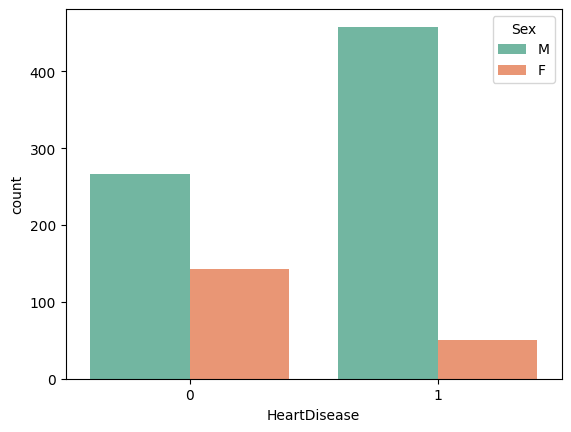

In [ ]:
sns.countplot(x='HeartDisease',data=df,hue='Sex',palette='Set2')